# import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()


In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation

# ------------------- seed 고정 -----------------------
np.random.seed(1024)
tf.random.set_seed(1024)

# data

In [4]:
# api에는 tensorflow.keras 쓰도록 되어있지만 keras가 떨어져 나와서 tensorflow 없어도 됨.
from keras.datasets import mnist # toydataset. 누구나 거쳐가는 데이터

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # keras에서 load_data는 train, test set 나눠서 한다.

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
y_train[:1], X_train[:1] # y_train 첫번째 값 5, X_train[:1]은 28*28 한 장

(array([5], dtype=uint8),
 array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            3,  18,  18,  18, 126, 136, 175,  26,

# EDA

(60000, 28, 28)


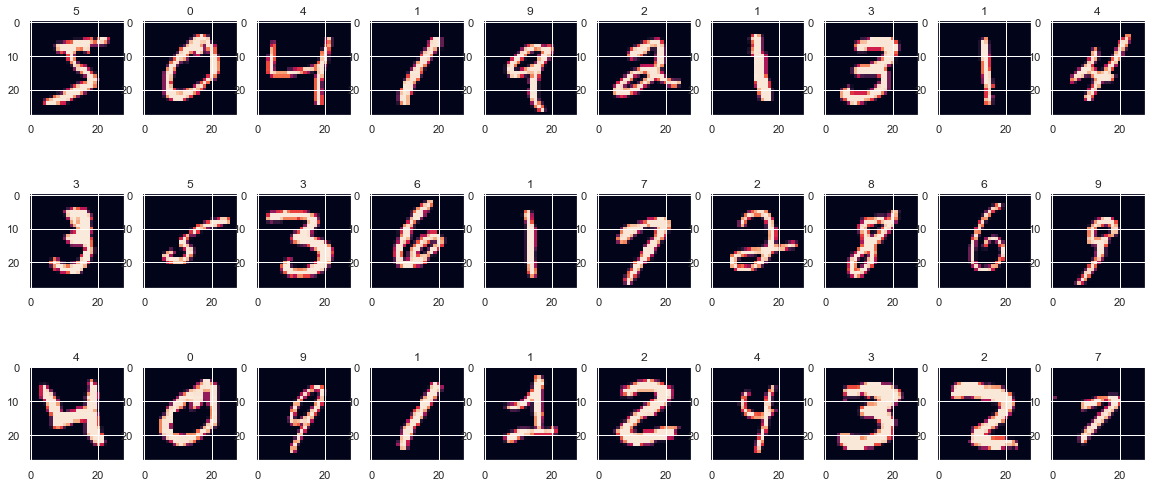

In [8]:
# import matplotlib.pyplot as plt
p, axes = plt.subplots(3,10,figsize=(20,9))

print(X_train.shape)
X_train.shape[0]
for i in range(30): # range(X_train[:30].shape[0]) 해도 된다.
    row=i//10
    col=i%10
    axes[row,col].imshow(X_train[i]) #, cmap=plt.get_cmap('gray'))
    axes[row,col].set_title(y_train[i])
plt.show()

## 미션: 0~9까지 10 개씩만 찍어보세요.

In [13]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [15]:
y_train_s=pd.Series(y_train)

In [27]:
X_train[6].shape

(28, 28)

In [50]:
y_train_s.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

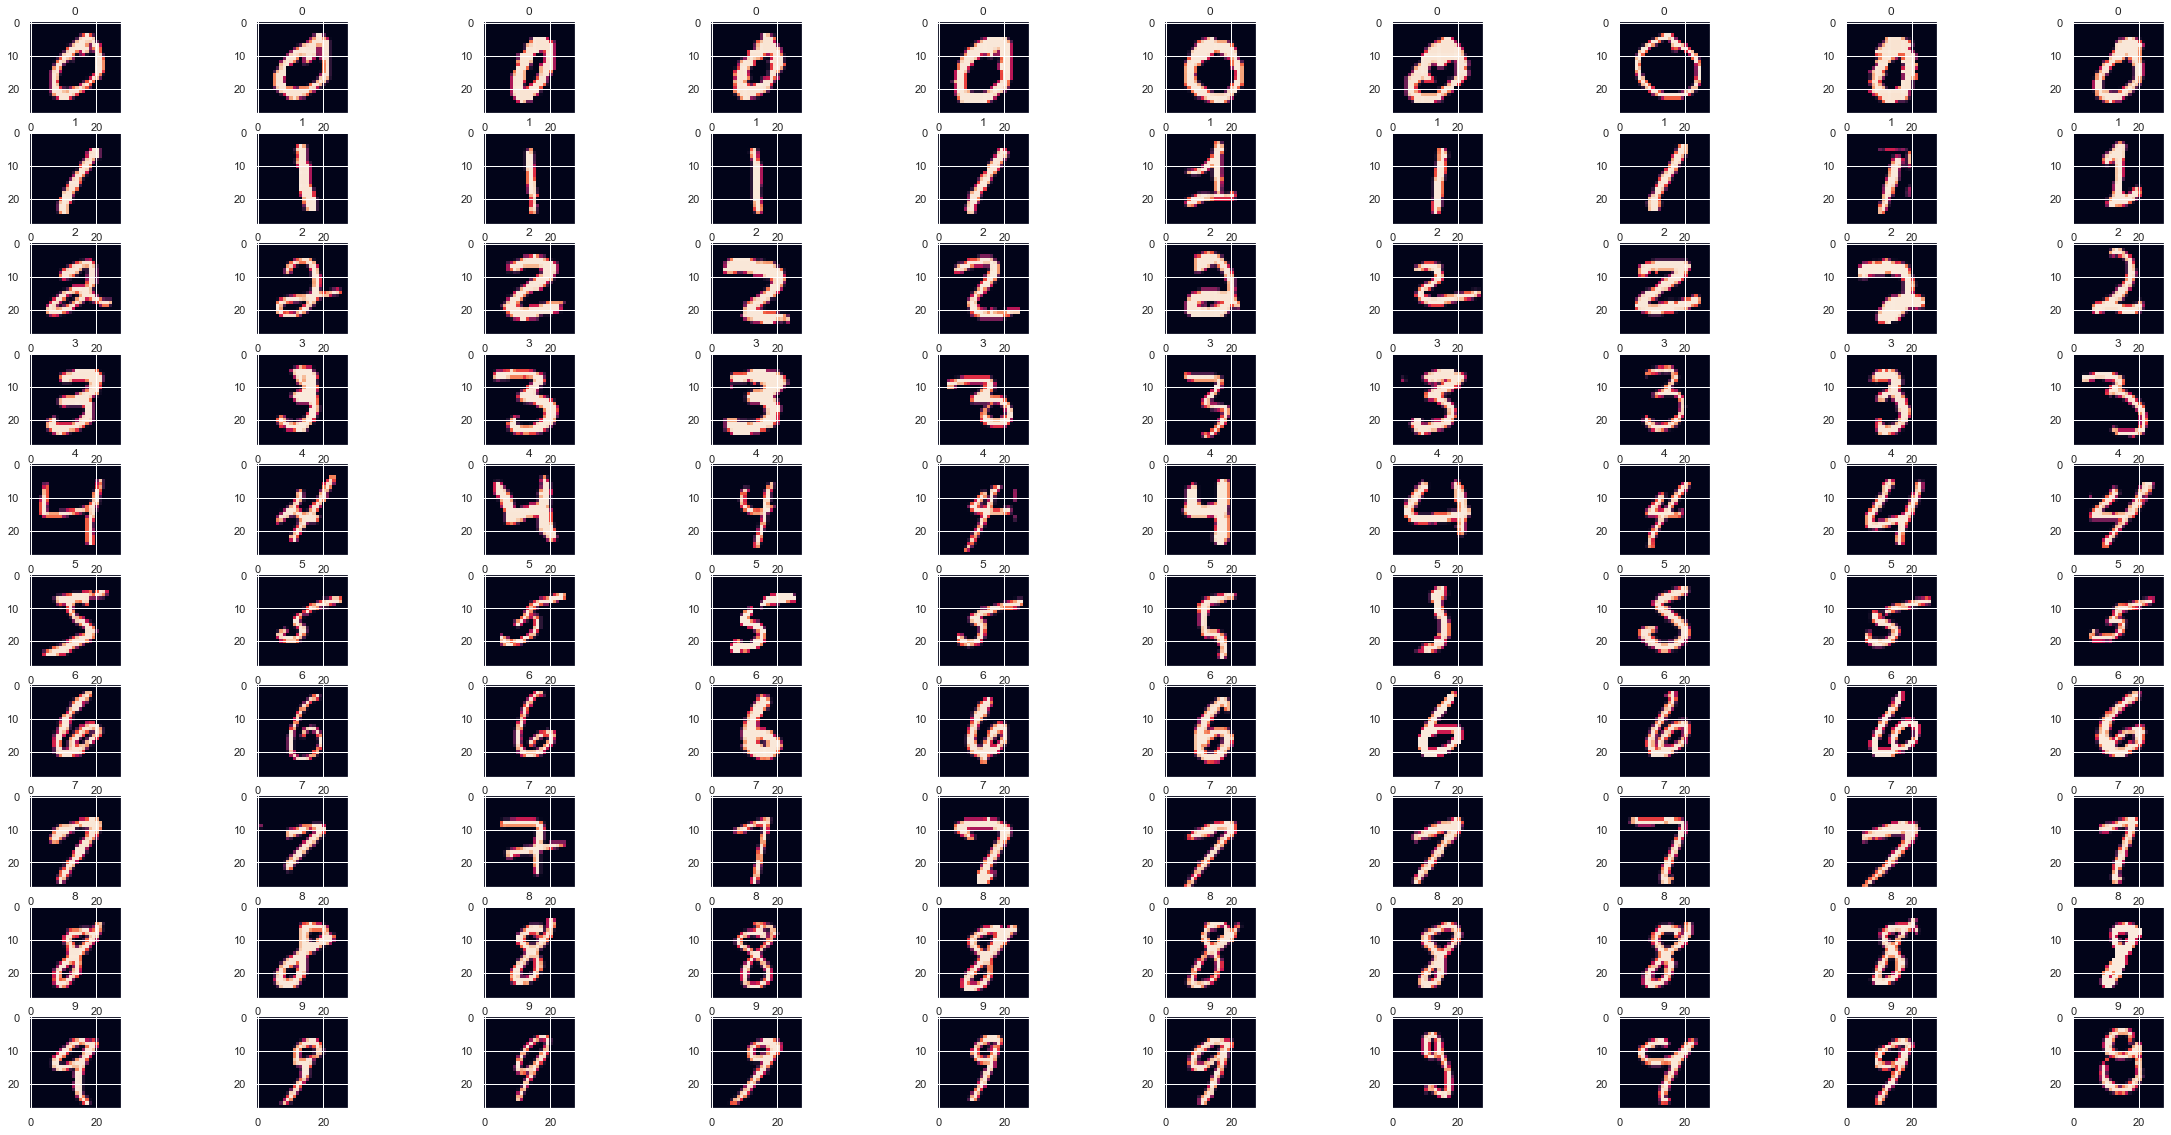

In [49]:
p, axes = plt.subplots(10,10,figsize=(40,20))
for num in range(10):
    for n, idx in enumerate(y_train_s[y_train_s==num].index[:10]):
        row=n//10+num
        col=n%10
        # print(num, n,idx,row,col)
        axes[row,col].imshow(X_train[idx]) #, cmap=plt.get_cmap('gray'))
        axes[row,col].set_title(y_train[idx])
plt.show()

In [47]:
# 두 줄 씩 배열하려면 +num*2 해야 함.
# p, axes = plt.subplots(20,5,figsize=(40,20))
# for num in range(10):
#     for n, idx in enumerate(y_train_s[y_train_s==num].index[:10]):
#         row=n//5+2*num
#         col=n%5
#         # print(num, n,idx,row,col)
#         axes[row,col].imshow(X_train[idx]) #, cmap=plt.get_cmap('gray'))
#         axes[row,col].set_title(y_train[idx])
# plt.show()

In [51]:
# 강사님 방법 참고
# idx_list.extend와 idx_lsit.append 차이: append는 idx_list이런 거 붙여서 더하고 extend는 요소값만 더함.

# X데이터 flatten() 화

<pre>
* 3D array --> 2D array(여야 할듯? 강사님은 2D => 1D라고 하심)
X_train.shape : (60000, 28, 28)
줄: 데이터 개수
칸: 28*28 = 784 만큼.

In [53]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [54]:
# 이거 안 하면 shape에러 난다.
input_shape = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(-1, input_shape)  # 3차원 -> 2차원
X_test = X_test.reshape(-1, input_shape)

In [55]:
# 강사님 방법
# X_train = X_train.reshape(X_train.shape[0], 784) # 784=28*28
# X_test = X_test.reshape(X_test.shape[0], 784) # 784=28*28

In [56]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# y label 평준화
y_label : integers in range 0-9

<pre>
* ML : arr.LabelEncoder() 글->숫, arr.OneHotEncoder() 1 0 0 0 ... df.get_dummies() 결측처리, 글->숫, 원핫

In [57]:
from tensorflow.keras.utils import to_categorical

print(y_train[:5])
y_train=to_categorical(y=y_train, num_classes=10, dtype='int32') # class 숫자 찍어줘야함
y_test=to_categorical(y=y_test, num_classes=10, dtype='int32')
print(y_train[:5]) # 원핫 인코딩화 되었다.

[5 0 4 1 9]
[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [58]:
print(y_train[:5], y_train.shape) # 원핫 인코딩화 되었다.
print(y_test[:5], y_test.shape) # 원핫 인코딩화 되었다.

[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]] (60000, 10)
[[0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]] (10000, 10)


# Model

<pre>
* Activation Function : sigmoid(0~1), tanh(-1~1), softmax(0~...n) relu(0,val)

In [79]:
model=Sequential()

# model.add(Dense(units=100 , activation='relu' ,input_dim=784)) # 784=28*28 한 줄로 폈을 때
model.add(Dense(units=64 , activation='relu' ,input_shape=(28*28,))) # 784=28*28 한 줄로 폈을 때. 28*28 뒤 쉼표는 몇 장 넣을지.
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=16 , activation='relu'))
model.add(Dense(units=10 , activation='softmax')) # 다중분류 예측(0~9)



# model.add(Dense(units=10 , activation='sigmoid')) # 내가 쓴 것. 다중분류????? to_categorical 하면 0~1 맞추는 거 아닌가

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


<pre>
* model.compile : lom
* model.compile(loss = '', optimizer='', metrics=[''])

* optimizer : back-propagation(역전파) 이용해서 편미분한 값을 이용해 가중치 최적화
gd(경사하강)
sgd(확률적 샘플링 경사하강)
momentum(가속도v*learning_rate)
adagrade(피쳐 별로 weight를 다르게 조정)
adam(momentum+adagrade)
rmsprop(...)

* loss : 오류
회귀: mse
분류: 이진분류 손실함수(sigmoid)   ------- 손실값(crossentropy) class=2
      다중분류 손실함수(softmax)   ------- 손실값(crossentropy) class > 2
      
      -> binary_crossentropy(원본값) : 0,1 또는 1,2 둘 중 하나일 때 (sparse_crossentropy도 가능)
          sparse_crossentropy(원본값) : 0~9~..... 여러 개 중 하나일 때
         categorical_crossentropy(원핫) : 0,0,0,0,0,1 (이런식)
                  

In [81]:
model.compile(loss='categorical_crossentropy', # logloss라고 써도 된다.
             optimizer='adam',
             metrics='accuracy')

In [82]:
res=model.fit(X_train,y_train,
              batch_size=128,   # 128바이트씩 끊어서 읽어라
              validation_split=0.1,
              # validation_data=(X_test,y_test),
              epochs=30
                )

Epoch 1/30
422/422 [==============================] - 2s 3ms/step - loss: 2.1438 - accuracy: 0.4886 - val_loss: 1.0278 - val_accuracy: 0.6405
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.8326 - accuracy: 0.7180 - val_loss: 0.5782 - val_accuracy: 0.8303
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4811 - accuracy: 0.8663 - val_loss: 0.3464 - val_accuracy: 0.9138
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.9083 - val_loss: 0.2920 - val_accuracy: 0.9282
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.2617 - accuracy: 0.9283 - val_loss: 0.2565 - val_accuracy: 0.9368
Epoch 6/30
422/422 [==============================] - 1s 2ms/step - loss: 0.2187 - accuracy: 0.9399 - val_loss: 0.2373 - val_accuracy: 0.9413
Epoch 7/30
422/422 [==============================] - 1s 2ms/step - loss: 0.1838 - accuracy: 0.9494 - val_loss: 0.2185 - val_accuracy: 0.9485
Epoch 

# test 데이터 예측

In [83]:
# 한 번도 안 보여준 데이터 맞춰봐
loss_cateforical_crossentropy, metrics_accuracy = model.evaluate(X_test, y_test) 

313/313 [==============================] - 0s 1ms/step - loss: 0.1806 - accuracy: 0.9679


# 평가 시각화

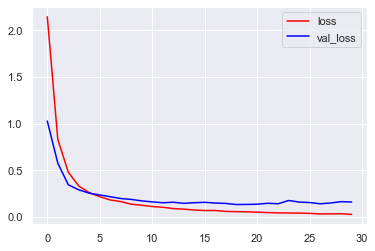

In [84]:
plt.plot(np.arange(len(res.history['loss'])), res.history['loss'], c='red', label='loss')
plt.plot(np.arange(len(res.history['val_loss'])), res.history['val_loss'], c='blue', label='val_loss')
plt.legend()
plt.show()

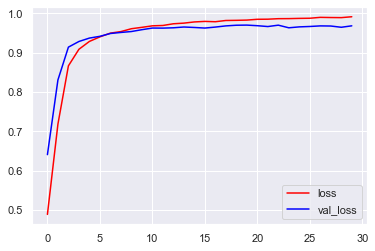

In [85]:
plt.plot(np.arange(len(res.history['accuracy'])), res.history['accuracy'], c='red', label='accuracy')
plt.plot(np.arange(len(res.history['val_accuracy'])), res.history['val_accuracy'], c='blue', label='val_accuracy')
plt.legend()
plt.show()

# 오답 확인(검증)

<pre>
마지막 activation softmax일 때
array([[1.13563655e-11, 4.09593217e-14, 3.44085223e-23, ...,
        1.67893665e-28, 9.50522733e-12, 5.38400990e-11],
       [9.99997973e-01, 1.86131458e-14, 1.95500684e-06, ...,
        1.15688993e-10, 5.19868726e-09, 2.61993023e-08],
       [1.36705456e-11, 1.35698246e-15, 9.77170398e-31, ...,
        3.26508331e-14, 1.54656667e-18, 4.22236361e-08],
       ...,
       [2.52357085e-14, 1.33963915e-15, 1.56802344e-26, ...,
        0.00000000e+00, 2.04294264e-12, 1.61712809e-15],
       [2.76852757e-06, 2.37285275e-10, 9.00545694e-15, ...,
        2.94714961e-21, 2.96000091e-09, 2.53697596e-09],
       [1.49634752e-06, 3.84673285e-07, 5.38747770e-07, ...,
        5.42919099e-10, 9.99994040e-01, 2.84778025e-06]], dtype=float32)


마지막 activation sigmoid일 때
array([[9.9661779e-01, 8.8259023e-01, 6.9181020e-05, ..., 9.9164963e-01,
        9.9969864e-01, 1.3897926e-02],
       [1.0000000e+00, 2.0549580e-01, 9.9998891e-01, ..., 7.2676921e-01,
        9.7586262e-01, 9.9989325e-01],
       [8.6293136e-07, 2.6617295e-06, 9.9933469e-01, ..., 1.2680653e-01,
        9.2893493e-01, 7.1668248e-05],
       ...,
       [1.0000000e+00, 9.9986327e-01, 8.2485935e-11, ..., 1.0000000e+00,
        1.0000000e+00, 1.3217325e-05],
       [8.5758209e-01, 6.0521007e-02, 4.1734385e-01, ..., 3.5417706e-02,
        7.6476723e-02, 3.0084848e-03],
       [1.1282463e-06, 4.9108565e-03, 7.1209371e-03, ..., 7.1980626e-06,
        9.9722326e-01, 3.1024814e-03]], dtype=float32)

In [121]:
# model(X_test) # 이렇게 하면 tf.Tensor형태라 값만 빼오기 어렵다.
# ans=model(X_test)

In [133]:
proba=model.predict(X_test)
print(proba[:2])

[[3.2699505e-13 1.0349015e-09 1.8672623e-07 5.8743863e-06 1.3602774e-20
  1.1846583e-22 0.0000000e+00 9.9999380e-01 1.5753494e-07 1.3302332e-11]
 [6.5144569e-17 5.5791101e-05 9.9994421e-01 7.1246191e-14 1.2105542e-10
  2.1392391e-22 5.6724192e-16 9.3335784e-09 8.1593556e-21 4.8789232e-22]]


In [152]:
proba[0].max()

0.9999938

In [154]:
proba.shape[0]

10000

In [208]:
# 최대값 찾기 - by csh
# max=proba[0].max()
# np.where(proba[0] == max)[0][0]

# np.argmax() 하면 편하다.

In [209]:
pred_list=[]
for i in range(proba.shape[0]):
    pred_list.append(np.argmax(proba[i])) # np.argmax: 가장 큰 값을 가지고 있는 인덱스 리턴 

In [210]:
pred_s=pd.Series(pred_list, name='pred')

In [211]:
real_list=[]
for i in range(y_test.shape[0]):
    real_list.append(np.argmax(y_test[i]))

In [212]:
real_s=pd.Series(real_list, name='real')

In [213]:
df=pd.concat([pred_s, real_s], axis=1)

In [214]:
df[df['pred']!=df['real']].index

Int64Index([   8,   43,  149,  151,  175,  233,  247,  321,  340,  404,
            ...
            9749, 9768, 9770, 9792, 9793, 9808, 9839, 9888, 9904, 9940],
           dtype='int64', length=321)

In [215]:
df[df['pred']!=df['real']]

,pred,real
8,6,5
43,1,2
149,4,2
151,3,9
175,9,7
...,...,...
9808,4,9
9839,7,2
9888,5,6
9904,6,2


In [216]:
X_test.shape

(10000, 784)

In [217]:
X_test_temp=X_test.reshape(10000,28,28)

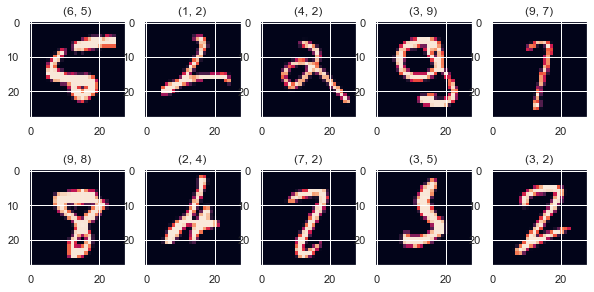

In [218]:
p, axes = plt.subplots(2,5,figsize=(10,5))
for n, idx in enumerate(df[df['pred']!=df['real']].index[:10]):
    row=n//5
    col=n%5
    # print(num, n,idx,row,col)
    axes[row,col].imshow(X_test_temp[idx]) #, cmap=plt.get_cmap('gray'))
    axes[row,col].set_title((df.iloc[idx, 0], df.iloc[idx, 1]))
plt.show()

In [ ]:
# proba=model.predict(X_test)

In [ ]:

pred_list=[]
for i in range(proba.shape[0]):
    pred_list.append(np.argmax(proba[i])) # np.argmax: 가장 큰 값을 가지고 있는 인덱스 리턴 
    
pred_s=pd.Series(pred_list, name='pred')

real_list=[]
for i in range(y_test.shape[0]):
    real_list.append(np.argmax(y_test[i]))
    
real_s=pd.Series(real_list, name='real')

df=pd.concat([pred_s, real_s], axis=1)

df[df['pred']!=df['real']].index

df[df['pred']!=df['real']]

X_test.shape

X_test_temp=X_test.reshape(10000,28,28)

p, axes = plt.subplots(2,5,figsize=(10,5))
for n, idx in enumerate(df[df['pred']!=df['real']].index[:10]):
    row=n//5
    col=n%5
    # print(num, n,idx,row,col)
    axes[row,col].imshow(X_test_temp[idx]) #, cmap=plt.get_cmap('gray'))
    axes[row,col].set_title((df.iloc[idx, 0], df.iloc[idx, 1]))
plt.show()

### 강사님 -> 전체 코드 참고(아주 깔끔하다)

In [219]:
# 예측값 꺼내기 더 간편한 버전
# for arr in proba:
#     print(np.argmax(arr))

In [ ]:
# proba = model.predict(X_test)
# print(len(proba), proba[:2])

# list=[]
# for arr in proba:
#     list.append(np.argmax(arr))

# ox_df = pd.DataFrame(dict형태로 어쩌고....)

In [ ]:
# for문 안에서 X_test[idx].reshape(28,28)해도 된다.
# set_title(f"{real} {pred}")이렇게 하면 깔끔

### 왜 이렇게 오차가 클까?
- rgb로 학습해서 자주색 빨간색같은 불필요한 정보가 들어온다.      => 흑백화
- 큰 수치는 좋은 걸로 학습한다. -> rgb에서 큰 값을 좋게 해석한다. => 정규화(이미지에서는 min-max scale 주로 사용)
cf. rgb 컬러 0~255 -> 비율을 유지하기 위해..????????????????????????????????????


# X 데이터 가공

## 가공

In [226]:
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

In [ ]:
print(X_train[:1])
print(X_train_scaled[:1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
  247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
  170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
    0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
   82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
  253 253 253 253 198 182 247 241   0 

## 재학습

In [228]:
model=Sequential()

# model.add(Dense(units=100 , activation='relu' ,input_dim=784)) # 784=28*28 한 줄로 폈을 때
model.add(Dense(units=64 , activation='relu' ,input_shape=(28*28,))) # 784=28*28 한 줄로 폈을 때. 28*28 뒤 쉼표는 몇 장 넣을지.
model.add(Dense(units=32 , activation='relu'))
model.add(Dense(units=16 , activation='relu'))
model.add(Dense(units=10 , activation='softmax')) # 다중분류 예측(0~9)

In [229]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [230]:
model.compile(loss='categorical_crossentropy', # logloss라고 써도 된다.
             optimizer='adam',
             metrics='accuracy')

In [231]:
res=model.fit(X_train_scaled,y_train,
              batch_size=128,   # 128바이트씩 끊어서 읽어라
              validation_split=0.1,
              epochs=30
                )

Epoch 1/30
422/422 [==============================] - 2s 2ms/step - loss: 0.4827 - accuracy: 0.8662 - val_loss: 0.1929 - val_accuracy: 0.9512
Epoch 2/30
422/422 [==============================] - 1s 2ms/step - loss: 0.2037 - accuracy: 0.9415 - val_loss: 0.1450 - val_accuracy: 0.9605
Epoch 3/30
422/422 [==============================] - 1s 2ms/step - loss: 0.1513 - accuracy: 0.9564 - val_loss: 0.1190 - val_accuracy: 0.9678
Epoch 4/30
422/422 [==============================] - 1s 2ms/step - loss: 0.1208 - accuracy: 0.9650 - val_loss: 0.1393 - val_accuracy: 0.9608
Epoch 5/30
422/422 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9702 - val_loss: 0.1054 - val_accuracy: 0.9708
Epoch 6/30
422/422 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9750 - val_loss: 0.0981 - val_accuracy: 0.9713
Epoch 7/30
422/422 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.1080 - val_accuracy: 0.9690
Epoch 

## test 데이터 예측

In [232]:
# 한 번도 안 보여준 데이터 맞춰봐
loss_cateforical_crossentropy, metrics_accuracy = model.evaluate(X_test_scaled, y_test) 

313/313 [==============================] - 0s 1ms/step - loss: 0.1404 - accuracy: 0.9725


## 평가 시각화

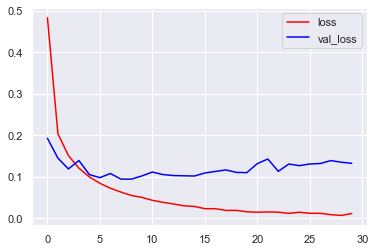

In [233]:
plt.plot(np.arange(len(res.history['loss'])), res.history['loss'], c='red', label='loss')
plt.plot(np.arange(len(res.history['val_loss'])), res.history['val_loss'], c='blue', label='val_loss')
plt.legend()
plt.show()

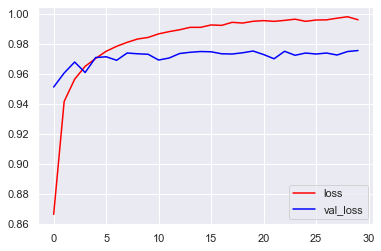

In [234]:
plt.plot(np.arange(len(res.history['accuracy'])), res.history['accuracy'], c='red', label='loss')
plt.plot(np.arange(len(res.history['val_accuracy'])), res.history['val_accuracy'], c='blue', label='val_loss')
plt.legend()
plt.show()

## 오답 확인(검증)

In [236]:
proba=model.predict(X_test_scaled)

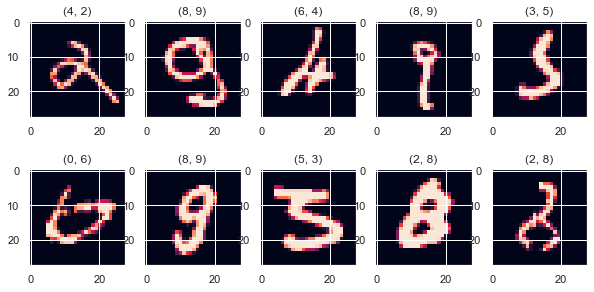

In [238]:
pred_list=[]
for i in range(proba.shape[0]):
    pred_list.append(np.argmax(proba[i])) # np.argmax: 가장 큰 값을 가지고 있는 인덱스 리턴 
    
pred_s=pd.Series(pred_list, name='pred')

real_list=[]
for i in range(y_test.shape[0]):
    real_list.append(np.argmax(y_test[i]))
    
real_s=pd.Series(real_list, name='real')

df=pd.concat([pred_s, real_s], axis=1)

df[df['pred']!=df['real']].index

df[df['pred']!=df['real']]

X_test.shape

X_test_temp=X_test_scaled.reshape(10000,28,28)

p, axes = plt.subplots(2,5,figsize=(10,5))
for n, idx in enumerate(df[df['pred']!=df['real']].index[:10]):
    row=n//5
    col=n%5
    # print(num, n,idx,row,col)
    axes[row,col].imshow(X_test_temp[idx]) #, cmap=plt.get_cmap('gray'))
    axes[row,col].set_title((df.iloc[idx, 0], df.iloc[idx, 1]))
plt.show()

In [239]:
df[df['pred']!=df['real']]

,pred,real
149,4,2
151,8,9
247,6,4
320,8,9
340,3,5
...,...,...
9779,8,2
9792,9,4
9808,4,9
9858,8,6


### scaling 후에 더 좋아졌다. -> 이미지 다룰 경우 픽셀 정규화 필수~~!!!!

In [ ]:
# 결국 딥러닝은 덴스 차이고 나머지 다 같다(open detect 빼고^^;; -> 이건 opencv)